## **Fase 2 - Análisis Exploratorio de Datos (EDA)**
*El Análisis Exploratorio de Datos (EDA) es una etapa fundamental en el proceso analítico, donde se busca comprender las características principales de los datos y descubrir patrones ocultos.El objetivo del EDA es proporcionar una visión general y profunda del conjunto de datos, utilizando técnicas estadísticas y visuales. Esto no solo facilita la detección de anomalías y tendencias, sino que también ayuda a tomar decisiones informadas sobre el modelo analítico a aplicar. Con una sólida exploración, aseguramos que cada aspecto relevante de los datos sea considerado, estableciendo así el camino para un análisis robusto y preciso.*.

In [3]:
# ⁠General
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

In [5]:
df = pd.read_csv('data/df_final_cleaned.csv')

In [7]:
df

urls            timestamp  \
0     https://www.airbnb.es/rooms/126311759129279497...  2024-11-07 23:54:16   
1     https://www.airbnb.es/rooms/127904085557632410...  2024-11-07 23:54:16   
2     https://www.airbnb.es/rooms/913187918206344111...  2024-11-07 23:54:16   
3     https://www.airbnb.es/rooms/126566083301808951...  2024-11-07 23:54:16   
4     https://www.airbnb.es/rooms/31977850?adults=1&...  2024-11-07 23:54:16   
...                                                 ...                  ...   
2521  https://www.airbnb.es/rooms/13151223?adults=1&...  2024-11-07 23:54:16   
2522  https://www.airbnb.es/rooms/109718701780399279...  2024-11-07 23:54:16   
2523  https://www.airbnb.es/rooms/20975351?adults=1&...  2024-11-07 23:54:16   
2524  https://www.airbnb.es/rooms/52528580?adults=1&...  2024-11-07 23:54:16   
2525  https://www.airbnb.es/rooms/14352069?adults=1&...  2024-11-07 23:54:16   

                record_id                                             titles  \
0     1263117591292794971  La ubicación muy buena, cerca de todo si estás...   
1     1279040855576324107  Este anfitrión tiene 979 evaluaciones de otros...   
2      913187918206344111  Esta acogedora habitación cuenta con una cómod...   
3     1265660833018089515  Instalaciones y servicios nuevos a estrenar.es...   
4                31977850  hay una razón por la que hemos sido votados co...   
...                   ...                                                ...   
2521             13151223  Una habitación muy tranquila para 2-3 personas...   
2522  1097187017803992791  Olvídate de las preocupaciones en este alojami...   
2523             20975351  Piso tipo dúplex de obra nueva, muy luminoso, ...   
2524             52528580  Precioso estudio muy cerca de la playa muy tra...   
2525             14352069  Perfecto para viajes de negocios o de placer, ...   

                      host_name      property_types  prices_per_night  \
0                        Carmen  Alojamiento entero             115.0   
1                         David          Habitación              46.0   
2                        Manuel          Habitación              47.0   
3          BLAU Student Housing  Alojamiento entero             100.0   
4     St Christophers Barcelona          Habitación              33.0   
...                         ...                 ...               ...   
2521                       Mike          Habitación              55.0   
2522                    Beverly          Habitación              60.0   
2523                      Aylén  Alojamiento entero             104.0   
2524                    Gustavo  Alojamiento entero             120.0   
2525                      Jordi  Alojamiento entero             100.0   

                          location  ratings  num_reviews  cleaning_fee  \
0     Barcelona, Catalunya, España     0.00          0.0           0.0   
1     Barcelona, Catalunya, España     0.00          0.0          15.0   
2                              NaN     4.66         65.0           0.0   
3     Barcelona, Catalunya, España     4.89          0.0          35.0   
4                Barcelona, España     4.40        990.0           0.0   
...                            ...      ...          ...           ...   
2521                           NaN     4.74        197.0          10.0   
2522  Barcelona, Catalunya, España     4.78         59.0           0.0   
2523                           NaN     4.96          0.0           0.0   
2524                           NaN     4.83        136.0          50.0   
2525  Barcelona, Catalunya, España     4.78        258.0           0.0   

      dormitorios  camas  baños  maximum_guests check_in_hour check_out_hour  \
0             1.0    1.0    1.0             NaN         15:00          12:00   
1             NaN    1.0    0.5             1.0         17:00          11:00   
2             NaN    1.0    0.5             1.0         15:00          12:00   
3             1.0    1.0    1.0            

#### Durante este análisis, nos centraremos en:
- **Características numéricas**: Analizaremos las distribuciones, posibles valores atípicos y estadísticas descriptivas de las variables numéricas, como los precios por noche, las valoraciones y la cantidad de reseñas.
- **Características categóricas**: Examinaremos cómo se distribuyen las variables categóricas, como el tipo de propiedad y los servicios ofrecidos.
- **Manejo de valores atípicos**: Identificaremos posibles outliers en las variables numéricas que puedan afectar la calidad de nuestros análisis.

##### *A través de este análisis, obtendremos una comprensión más clara de la estructura de los datos y descubriremos posibles relaciones que nos ayuden a generar insights valiosos sobre las propiedades de Airbnb*.

In [10]:
# Filtrar columnas que no aportan valor para la análisis
df = df.drop(columns=['urls', 'timestamp', 'record_id', 'titles', 'location', 'host_name'])

In [12]:
def eda_visualization(df):

    # Análisis de las columnas numéricas
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(18, 6))
        
        # Subplot 1: Histograma para ver la distribución de la columna
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Histograma de {column}')
        
        # Subplot 2: Boxplot para identificar outliers
        plt.subplot(1, 3, 2)
        sns.boxplot(df[column], color='red')
        plt.title(f'Boxplot de {column}')
        
        plt.tight_layout()
        plt.show()

    # Análisis de las columnas categóricas
    for column in df.select_dtypes(include=['object']).columns:      
        plt.figure(figsize=(18, 6))
        
        # Subplot 1: Countplot para ver la distribución de las categorías
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        plt.title(f'Frecuencia de {column}')
        plt.xticks(rotation=45)

        # Subplot 2: Boxplot para ver cómo las categorías influyen
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color='purple')
        plt.title(f'Relación entre {column} y {column}')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

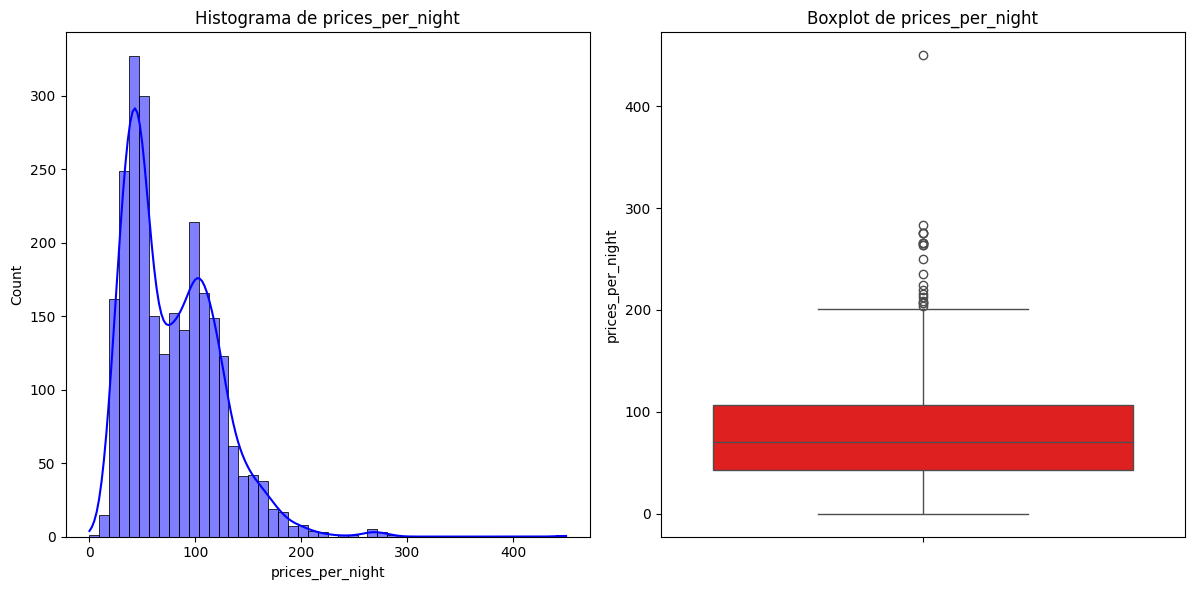

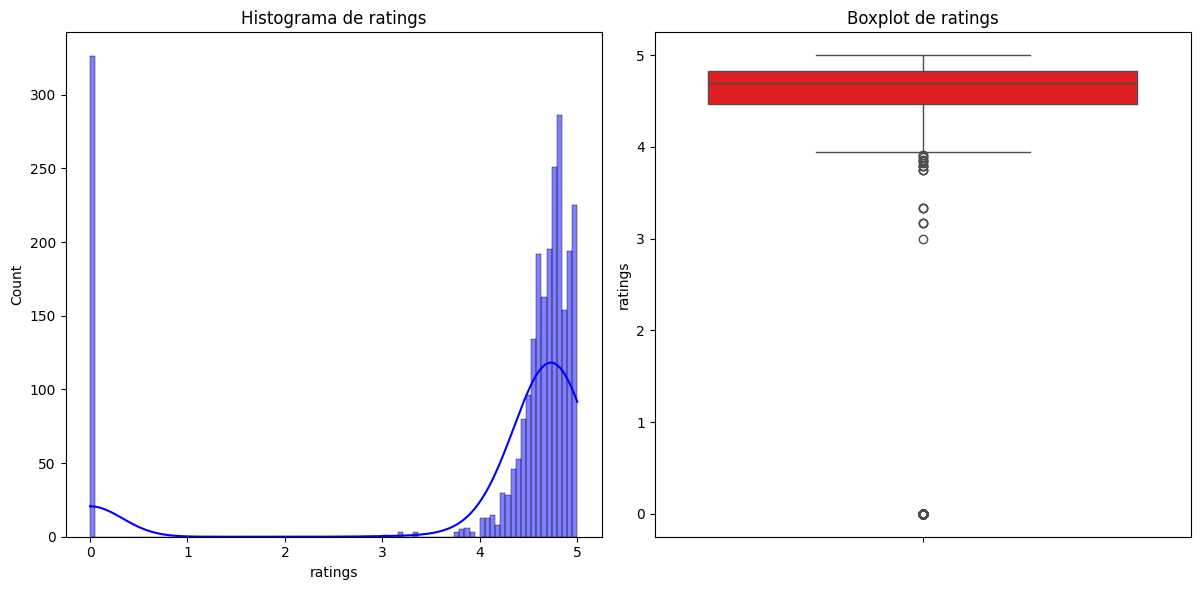

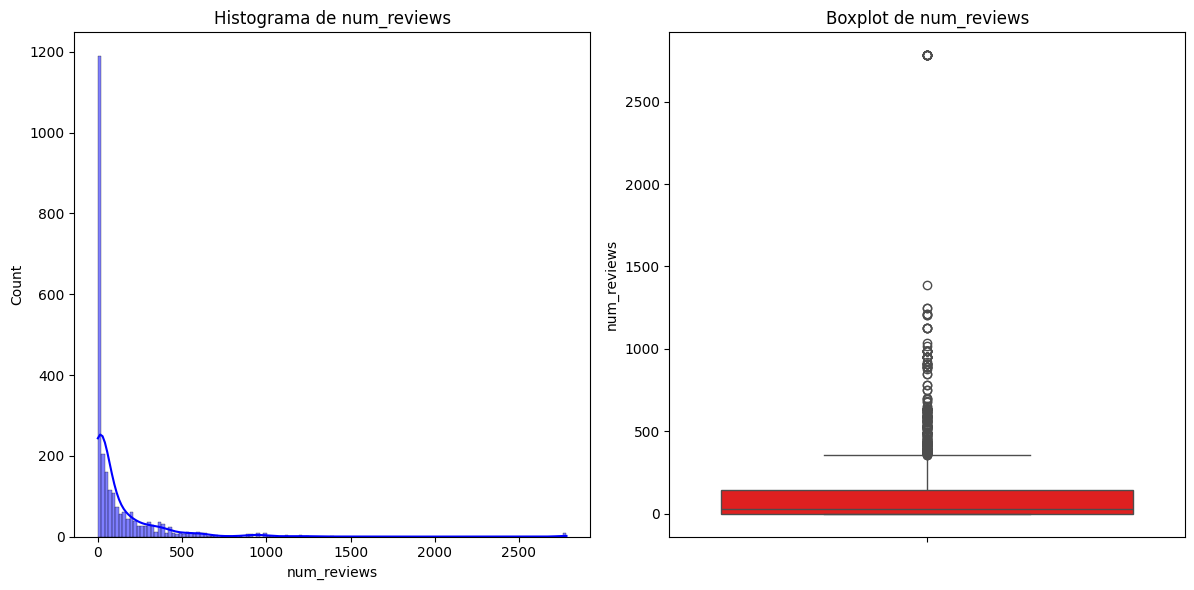

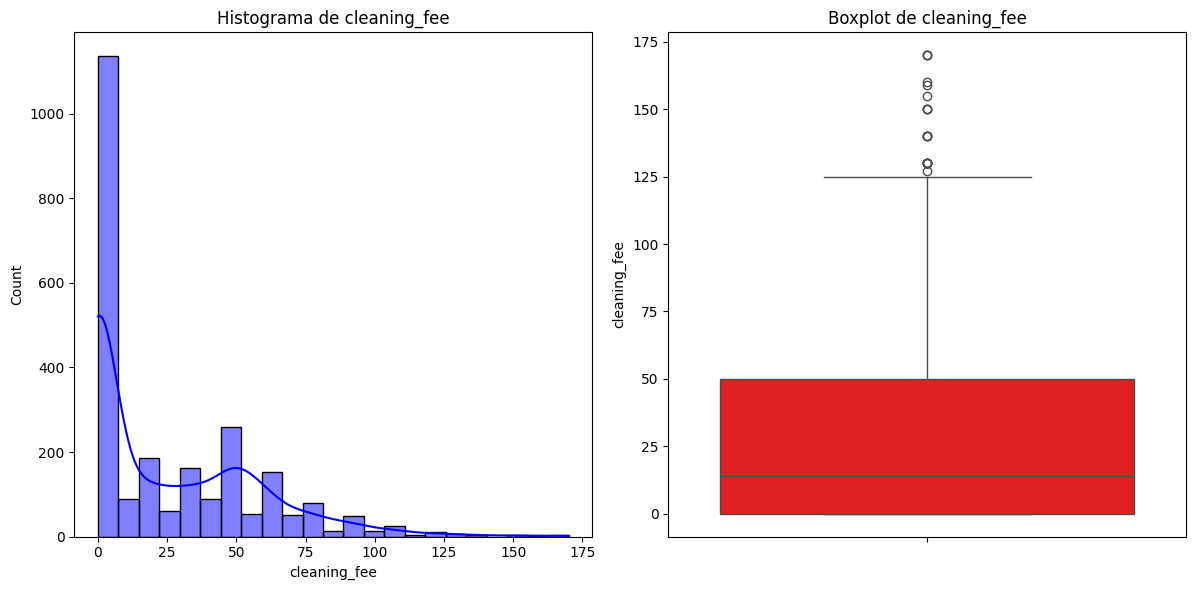

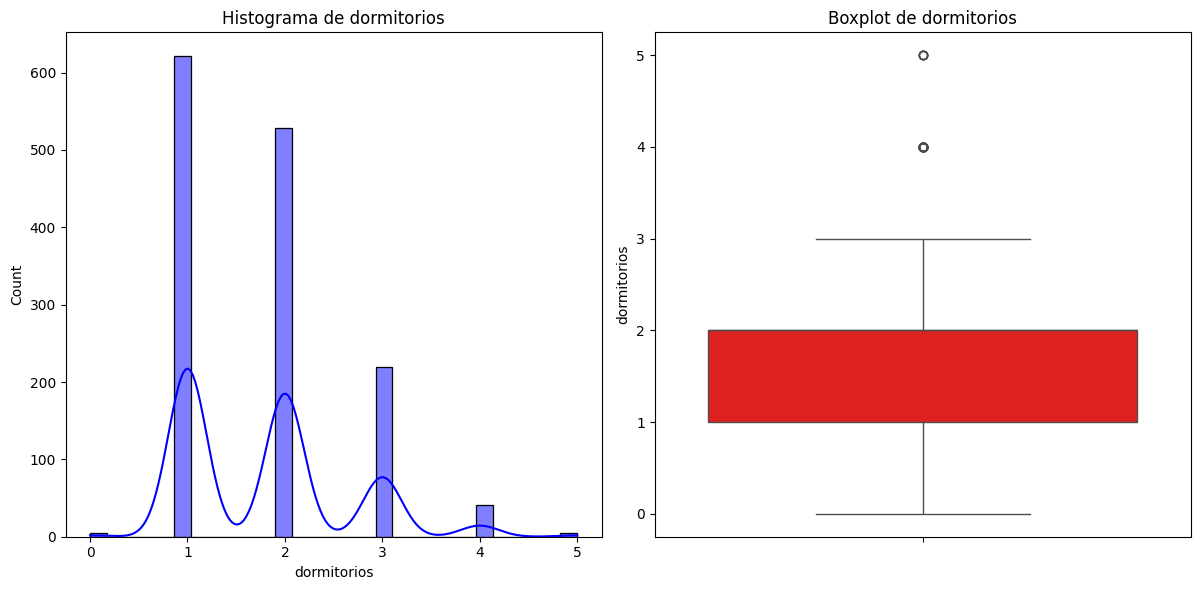

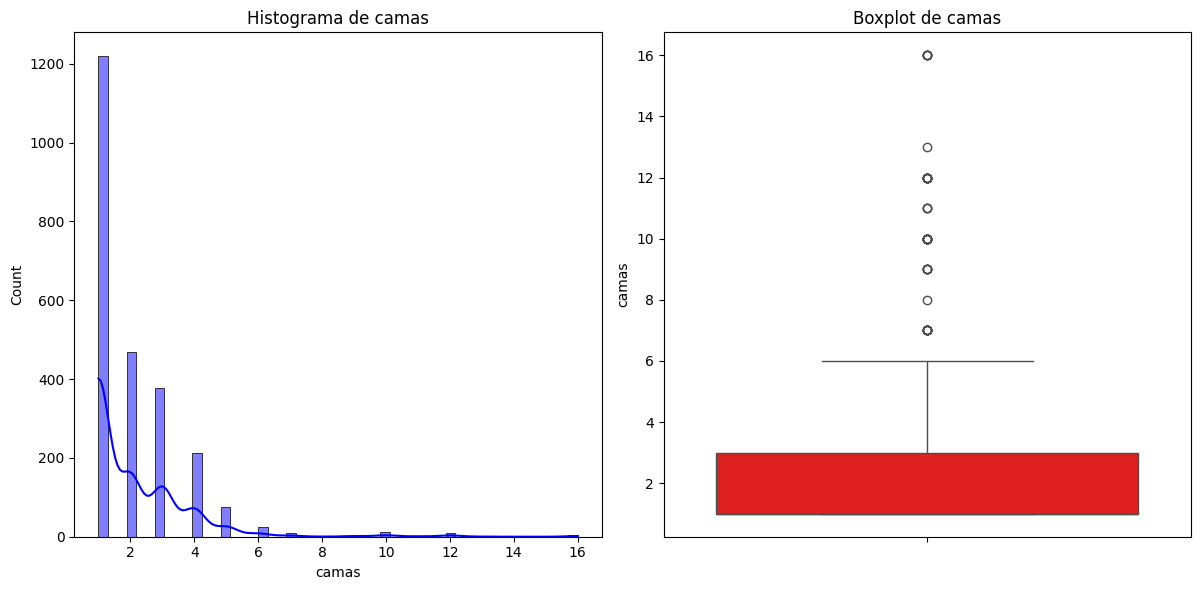

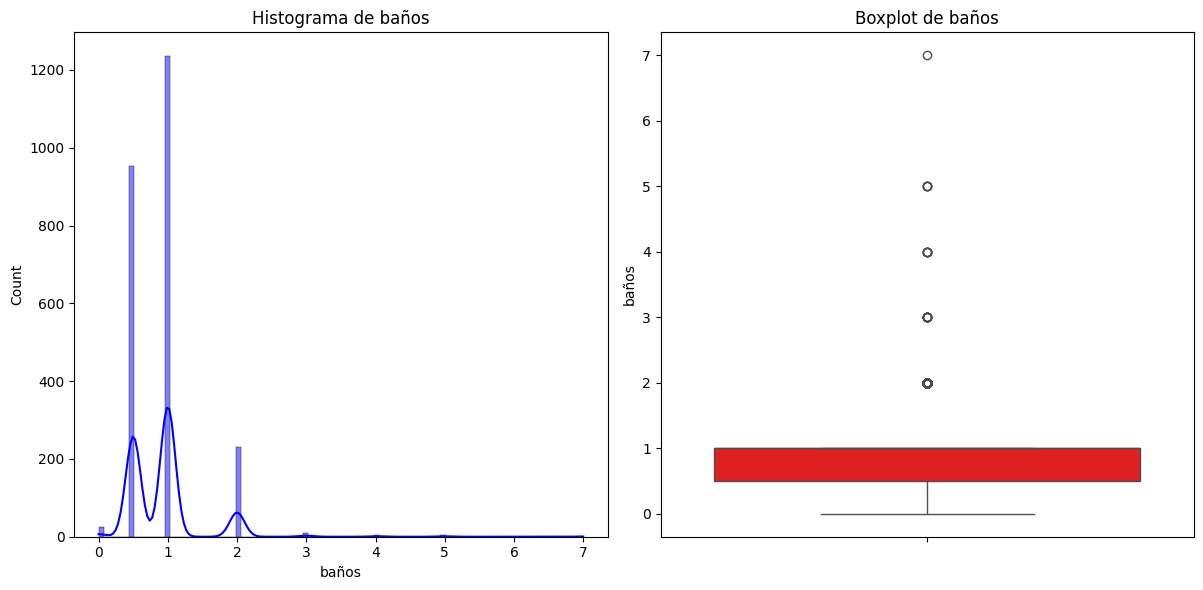

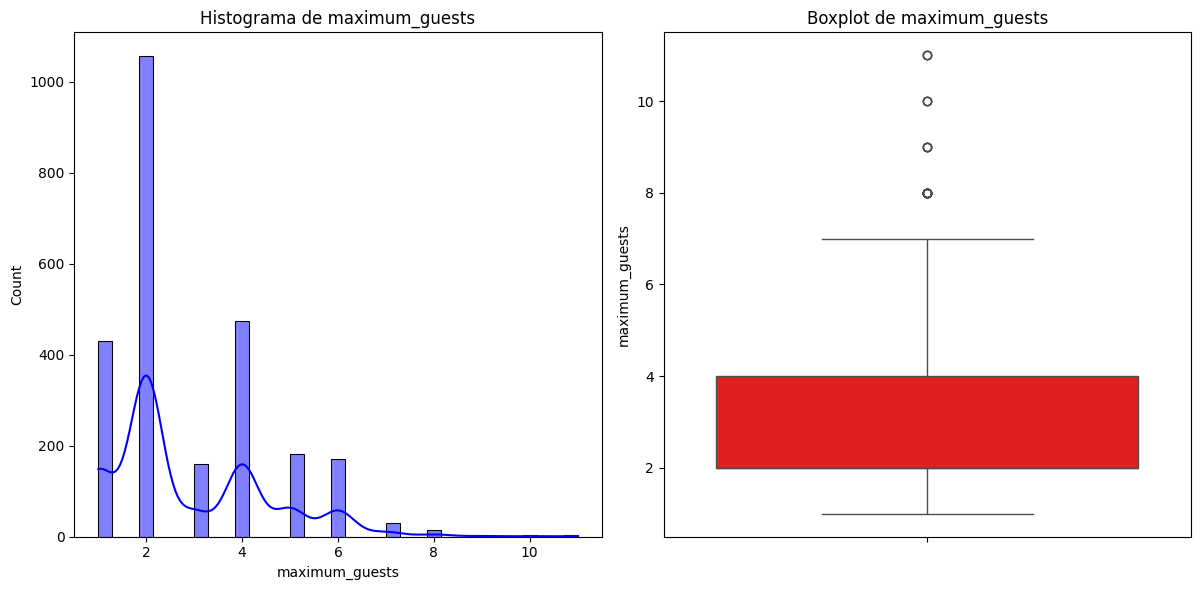

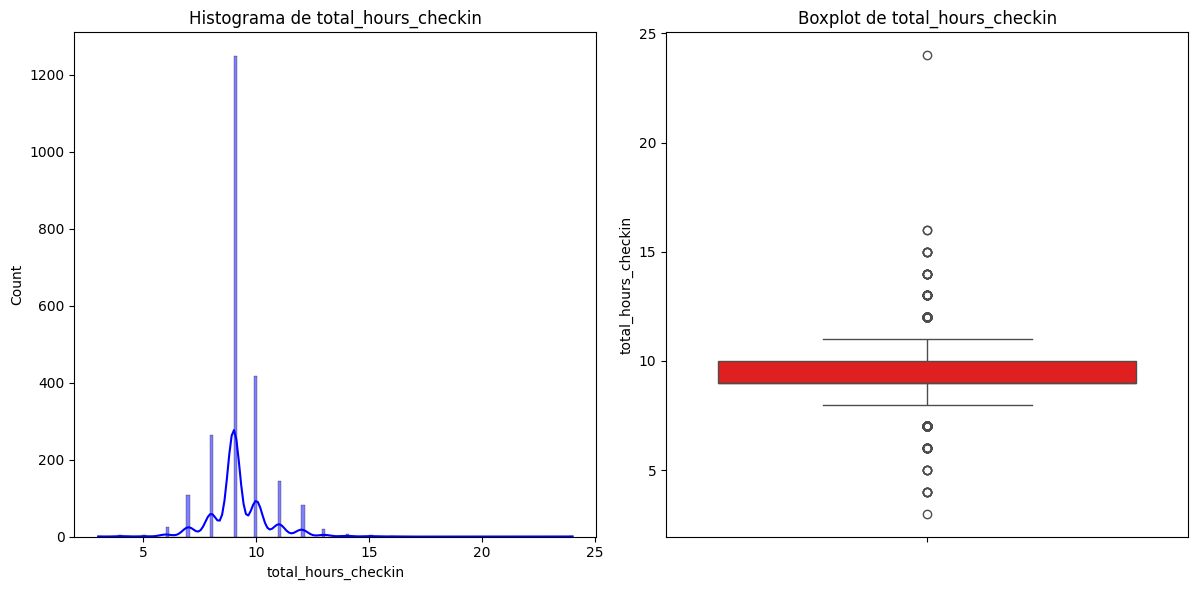

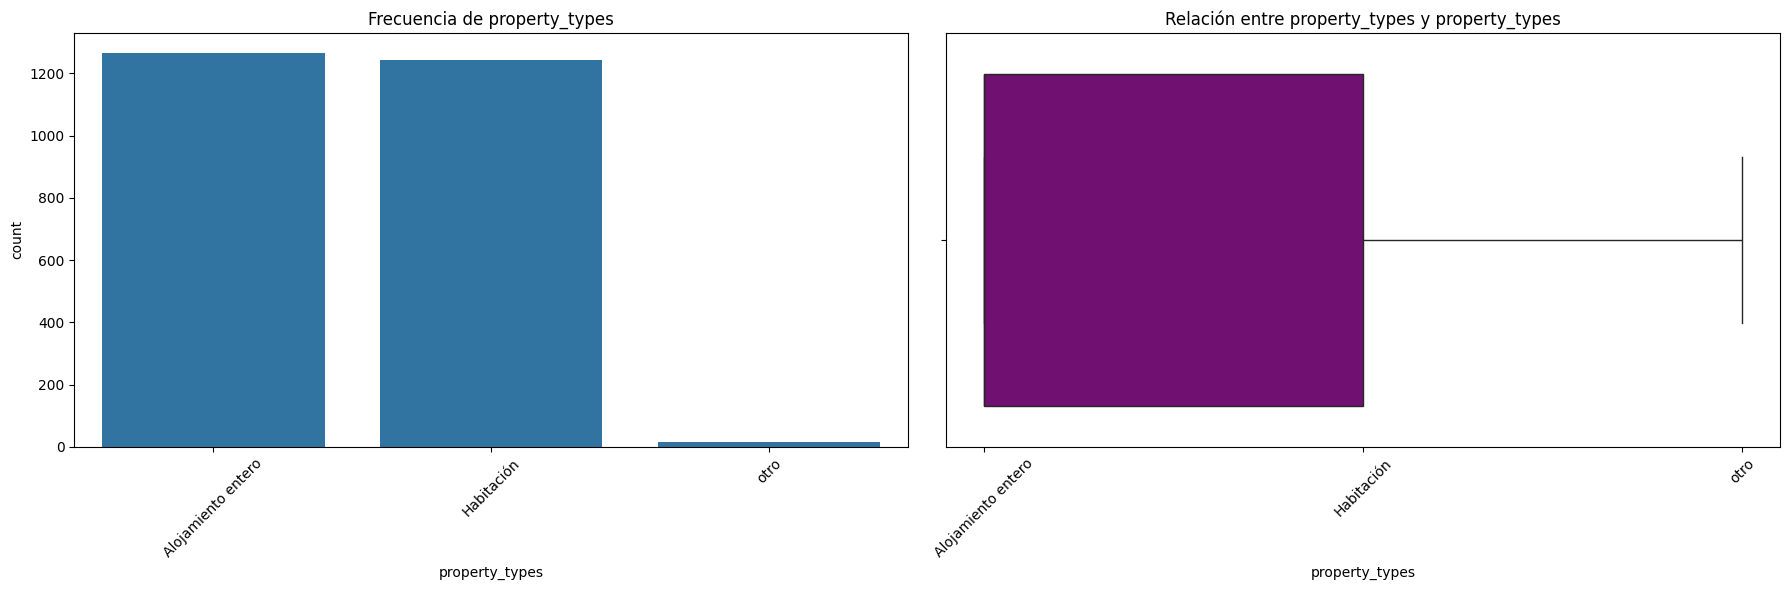

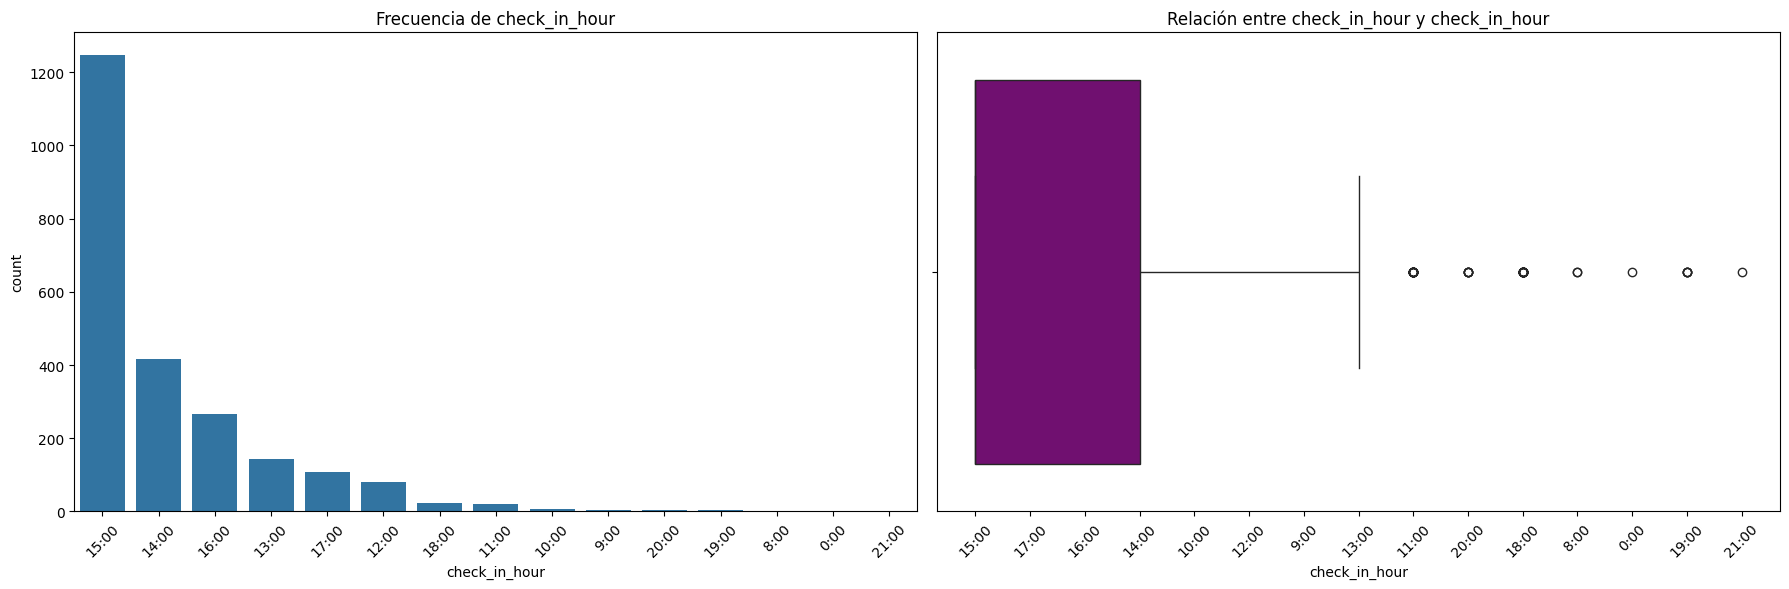

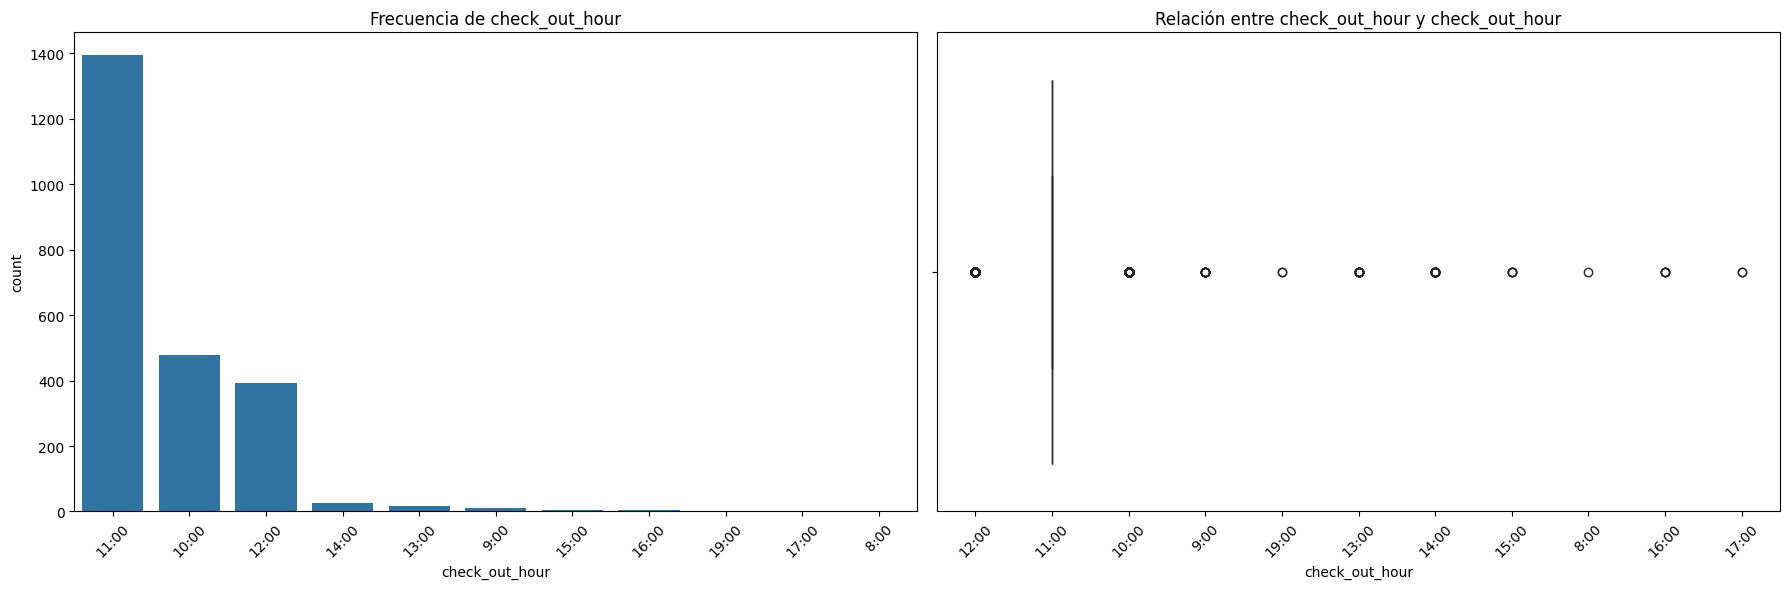

In [14]:
eda_visualization(df)

### Algunos puntos a reflexionar:

- Precios siguen una distribución normal

- Para los ratings, hay que tener en cuenta que los valores 0 son porque las habitaciones aun no han recibido comentarios, para que no afecte a su analisis


#### **Análisis de la Relación con el Precio por Noche**
- En esta sección, exploramos cómo las diferentes variables del conjunto de datos se relacionan con el precio por noche. Para las variables numéricas, analizamos su distribución y cómo se correlacionan con el precio, mientras que para las variables categóricas, exploramos su impacto sobre el precio mediante gráficos como boxplots y countplots.

#### *Este análisis nos ayudará a entender mejor cómo las características de los alojamientos afectan los precios y a identificar posibles patrones o outliers*.


In [18]:
def eda_visualization_with_price(df):
    # Excluir columnas que no aportan valor
    df = df.drop(columns=['urls', 'timestamp', 'record_id', 'Titles', 'Location', 'host_name'], errors='ignore')

    # Análisis de las columnas numéricas en relación al precio
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column == 'prices_per_night':
            continue

        plt.figure(figsize=(18, 6))
        
        # Subplot 1: Scatterplot para ver la relación
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=df[column], y=df['prices_per_night'], color='blue')
        plt.title(f'Relación entre {column} y el precio por noche')
        
        # Subplot 2: Boxplot para ver cómo afectan al precio
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], y=df['prices_per_night'], color='red')
        plt.title(f'{column} en relación con el precio por noche')
        
        # Subplot 3: Histograma de los precios
        plt.subplot(1, 3, 3)
        sns.histplot(df['prices_per_night'], kde=True, color='green')
        plt.title('Distribución del precio por noche')
        
        plt.tight_layout()
        plt.show()

    # Análisis de las columnas categóricas en relación al precio
    for column in df.select_dtypes(include=['object']).columns:        
        plt.figure(figsize=(18, 6))
        
        # Subplot 1: Boxplot de categorías vs precio
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[column], y=df['prices_per_night'], color='purple')
        plt.title(f'Relación entre {column} y el precio por noche')
        plt.xticks(rotation=45)
        
        # Subplot 2: Countplot de frecuencia de categorías
        plt.subplot(1, 2, 2)
        sns.countplot(x=df[column], order=df[column].value_counts().index, color='orange')
        plt.title(f'Frecuencia de {column}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

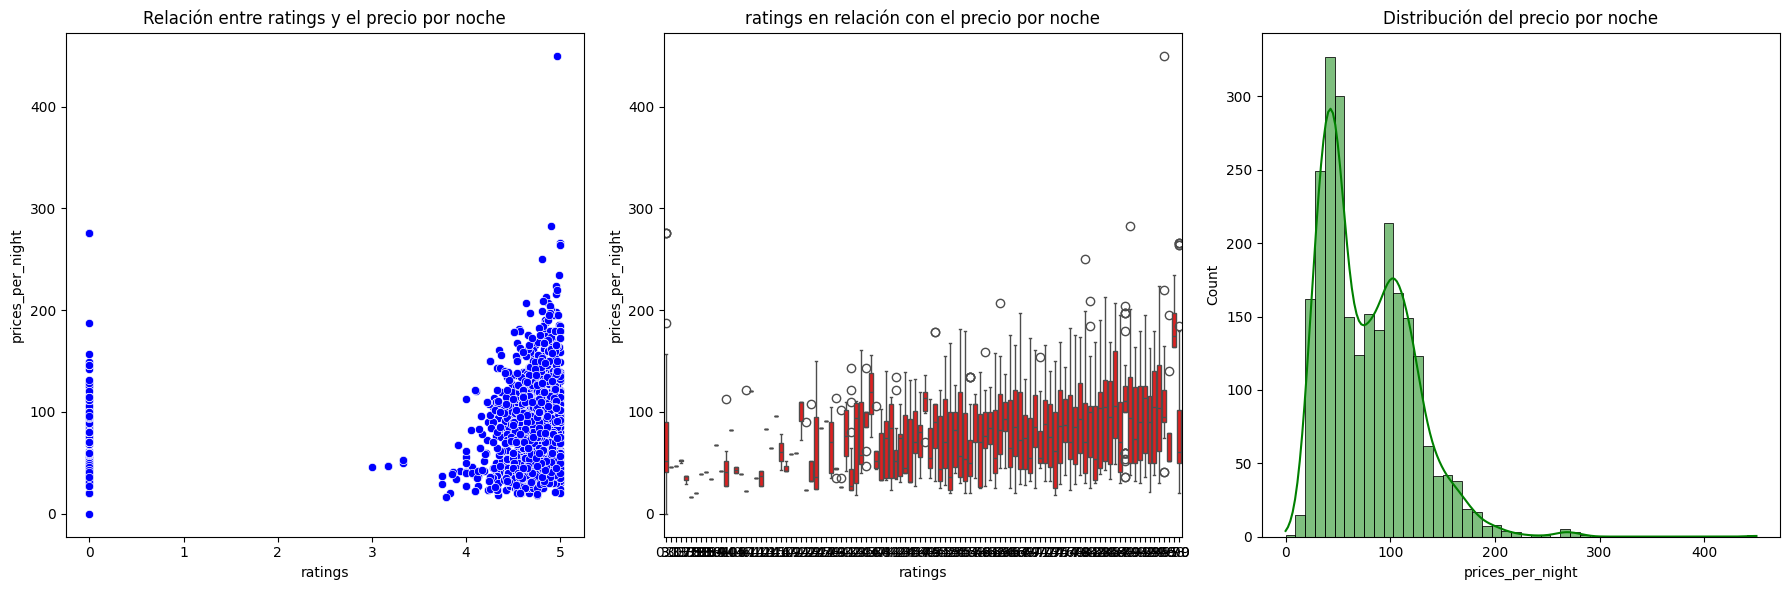

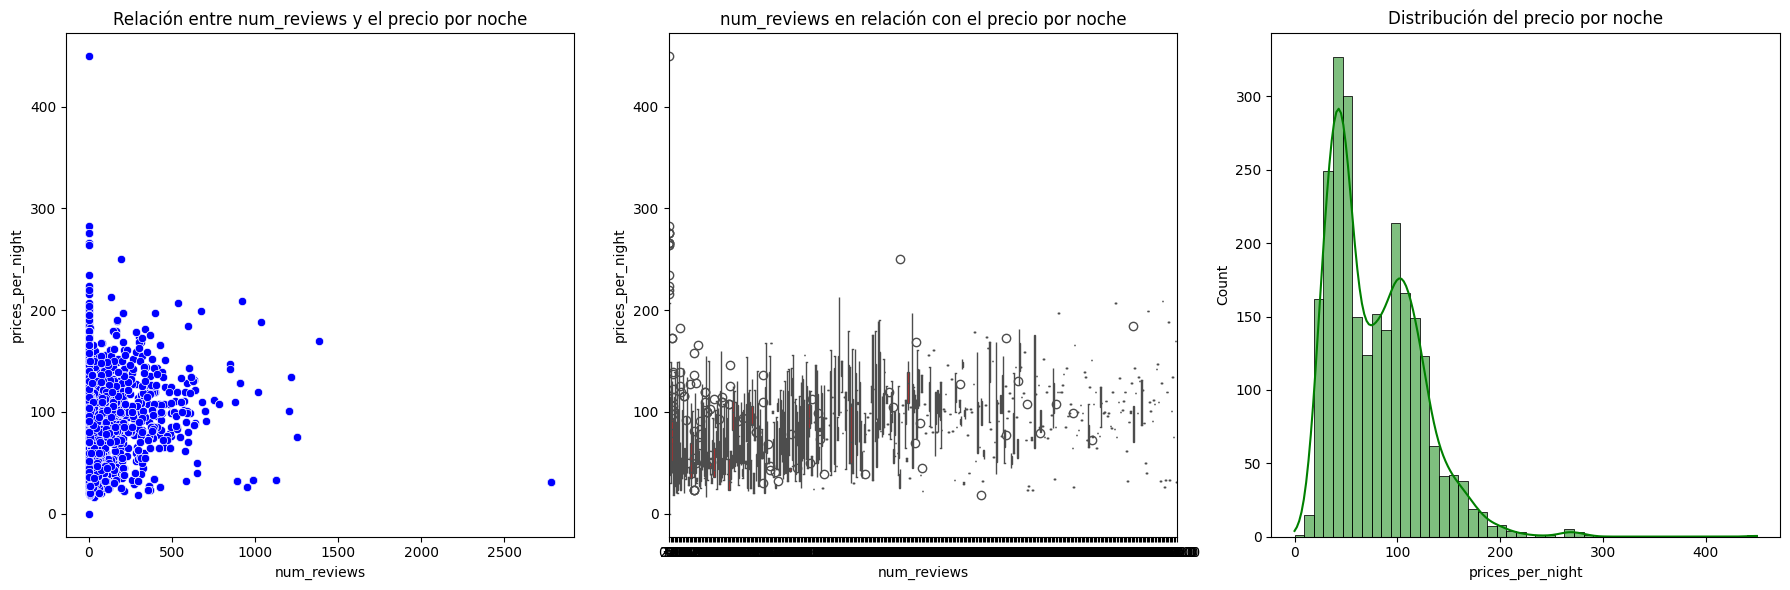

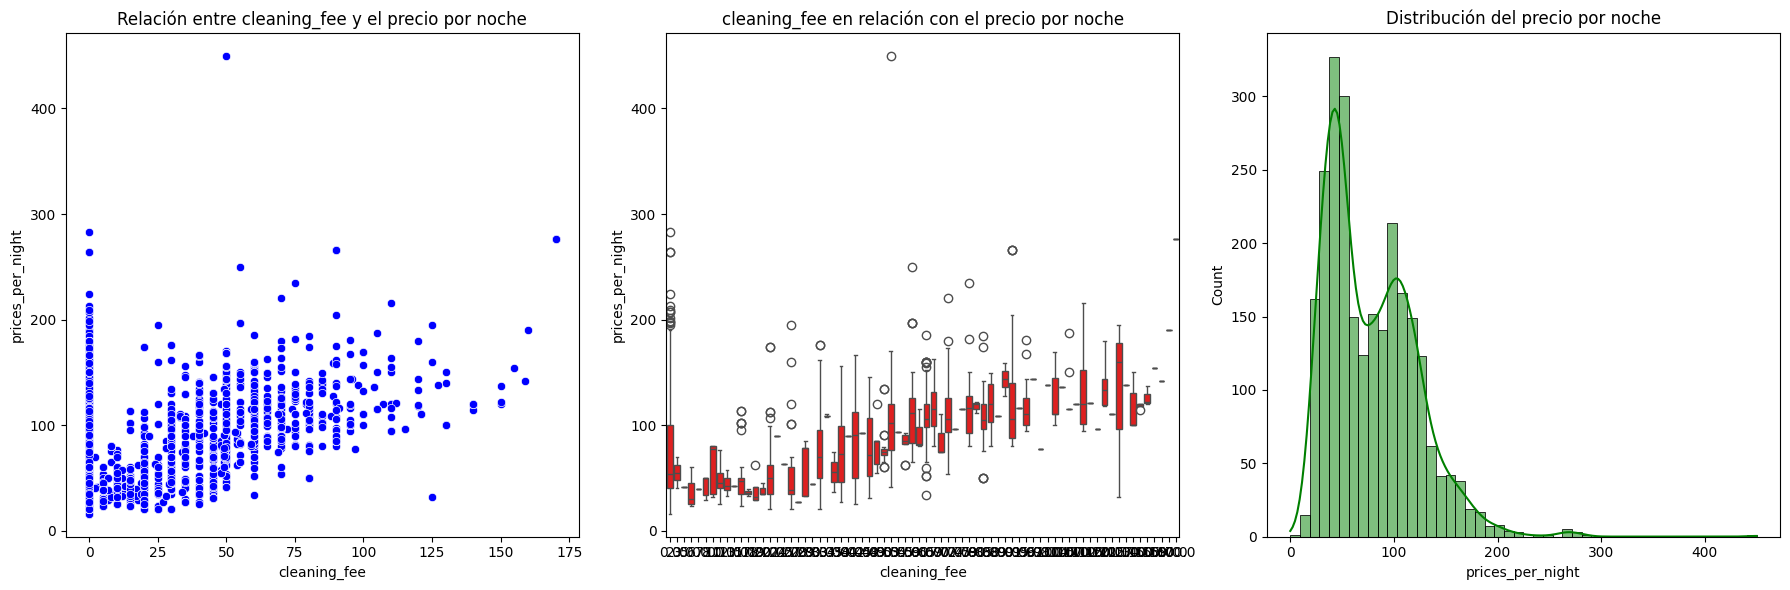

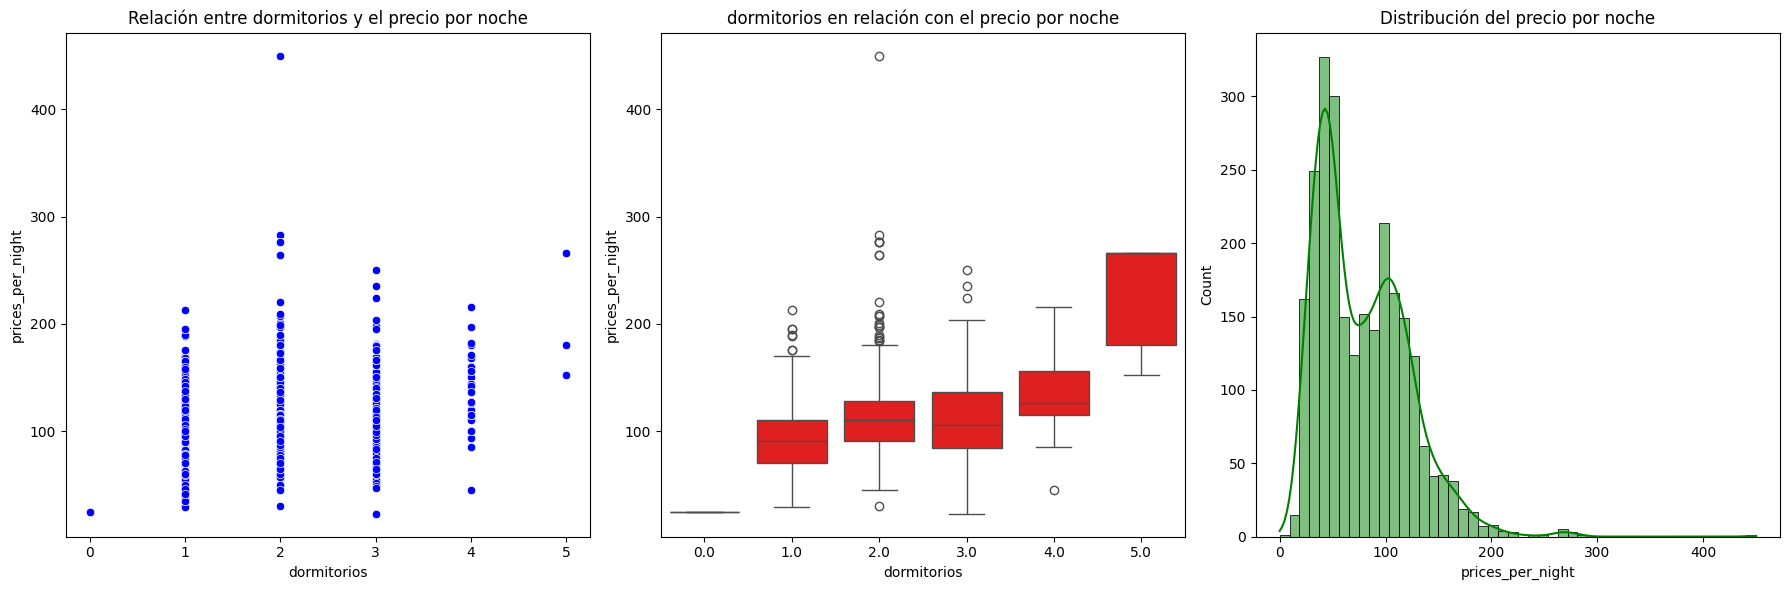

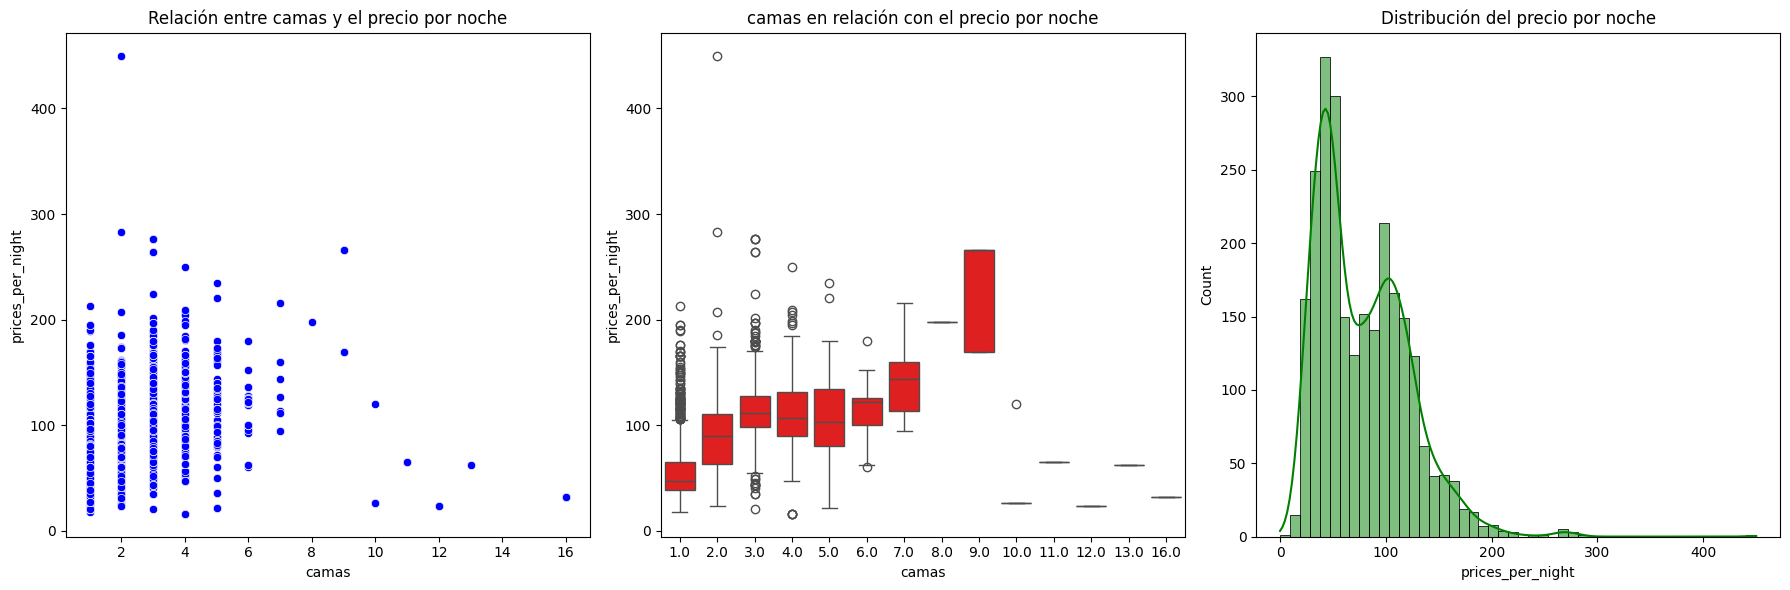

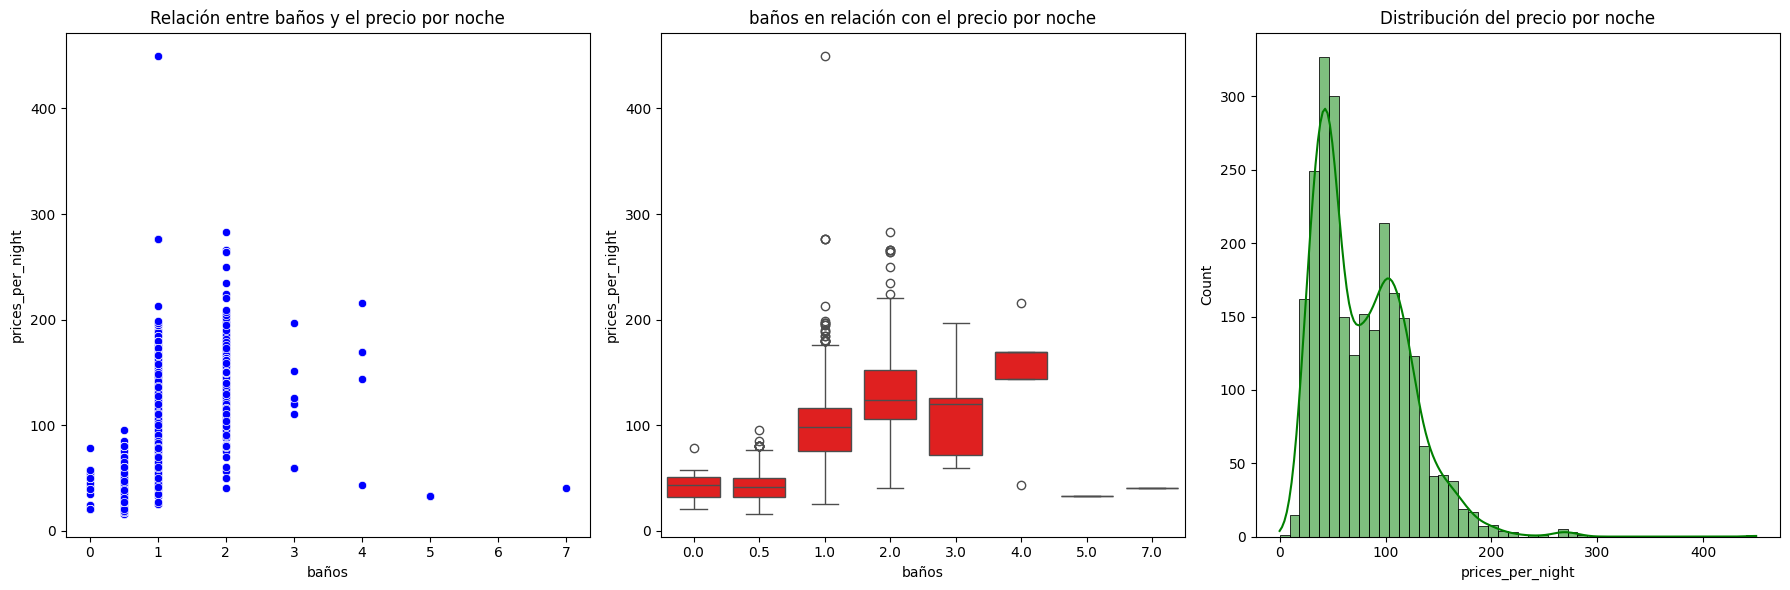

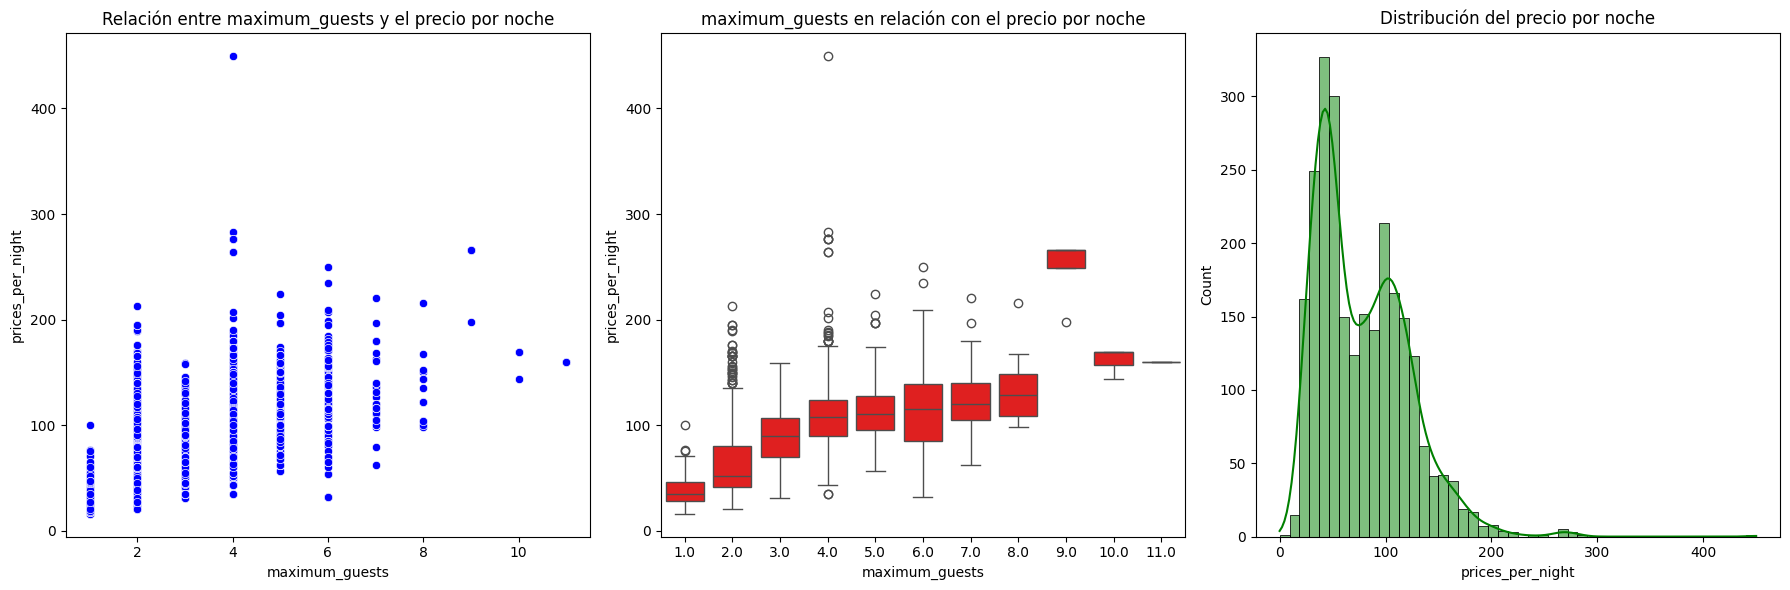

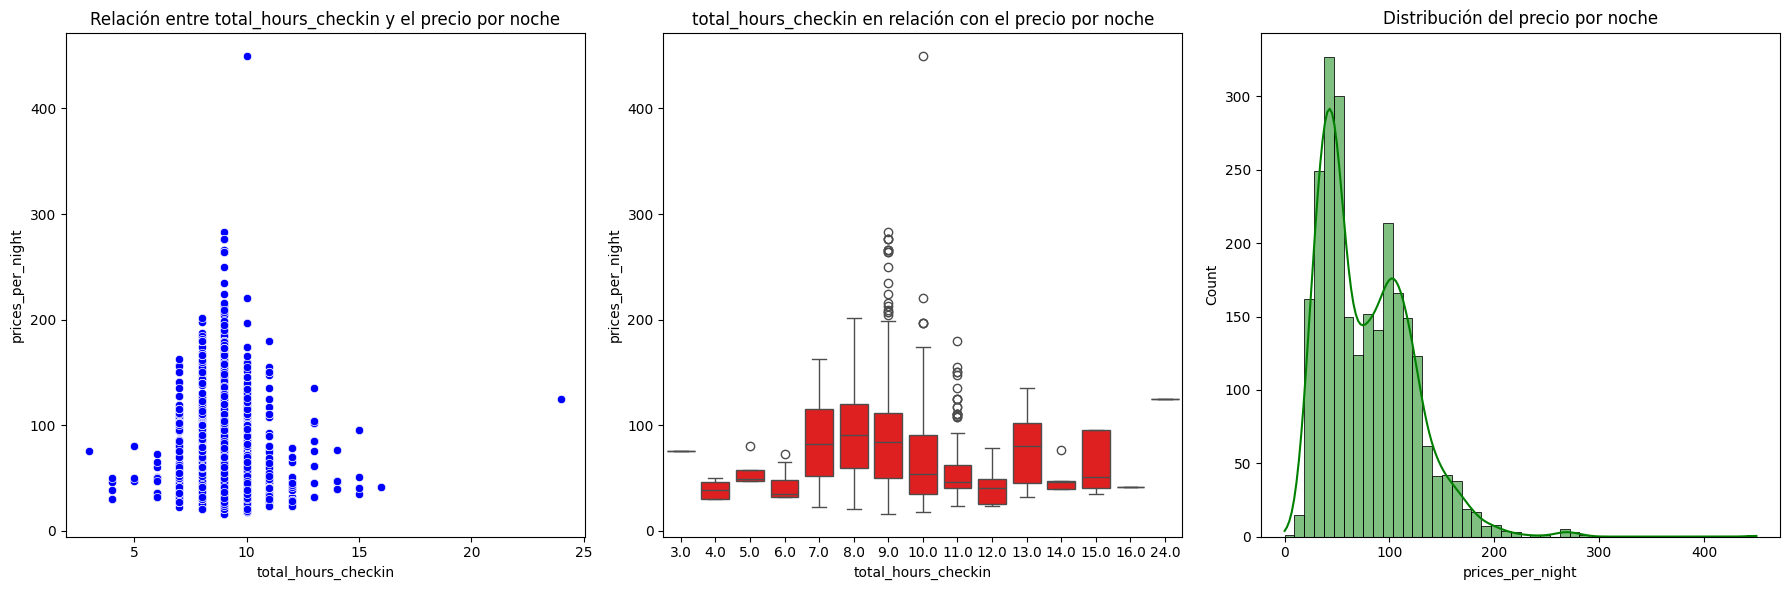

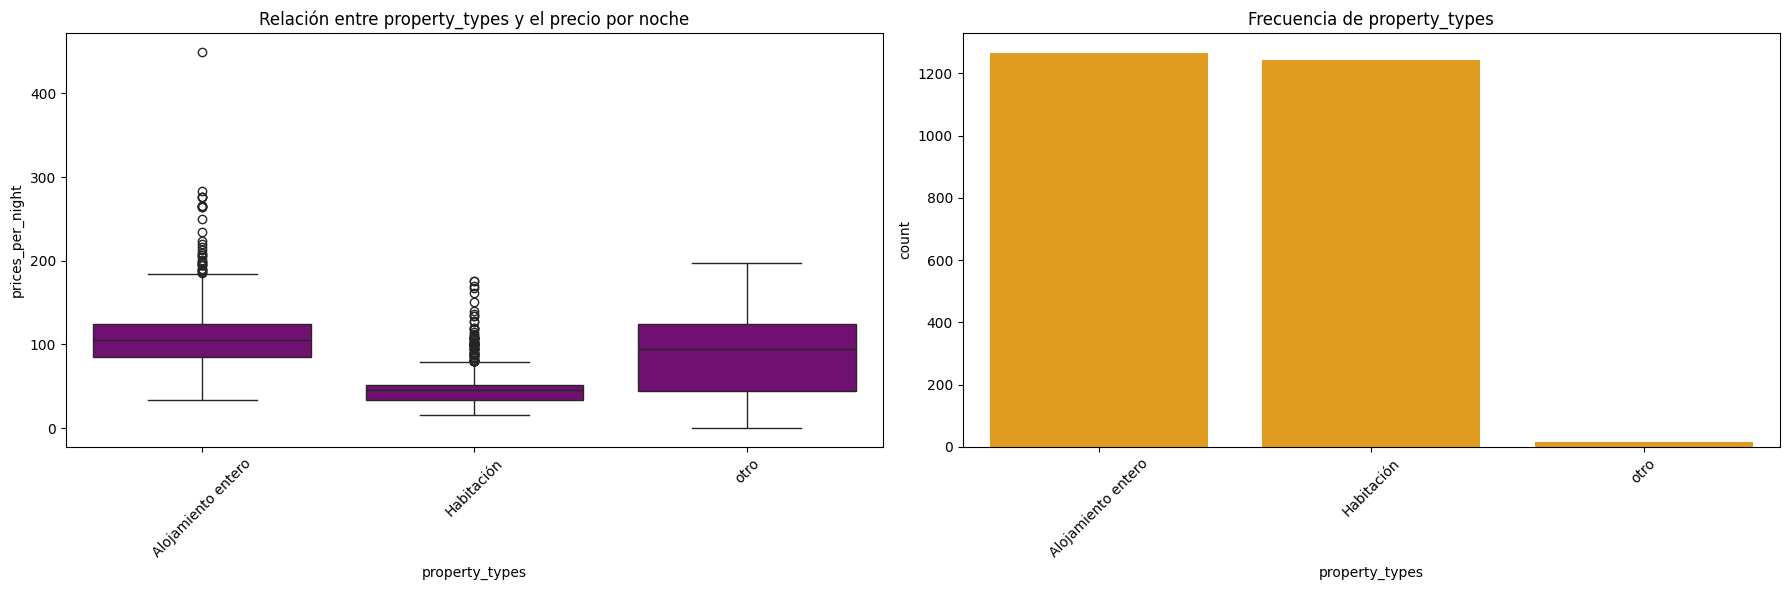

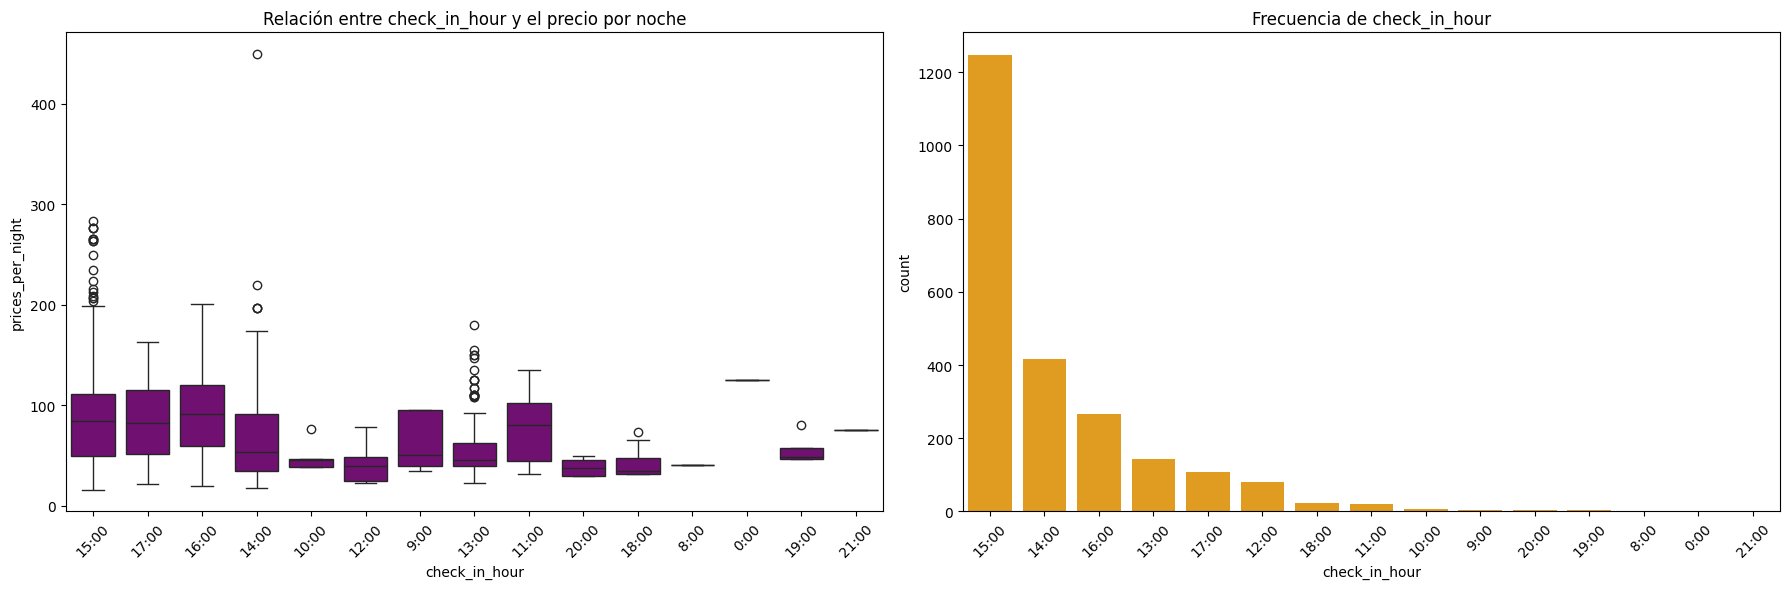

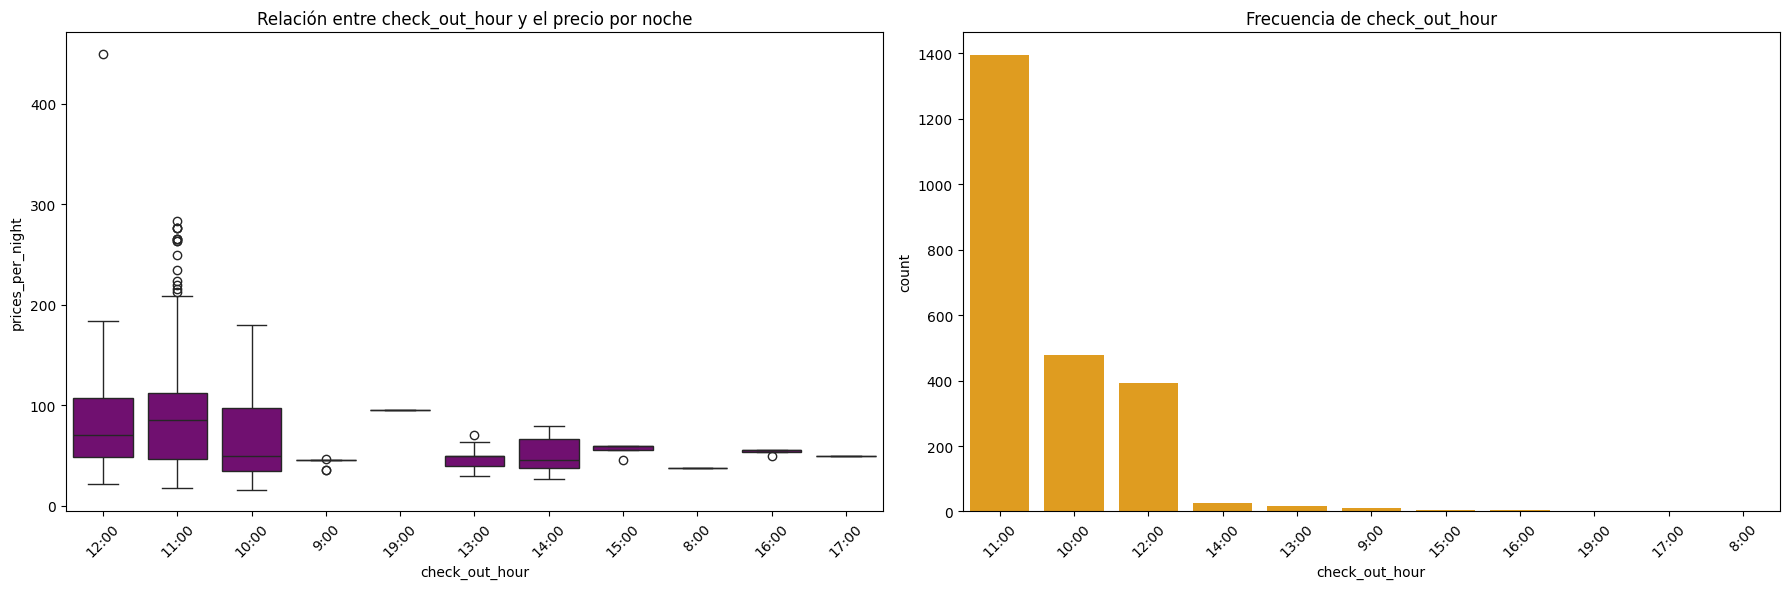

In [20]:
eda_visualization_with_price(df)

#### **Análisis de outliers en relación con el Precio por noche**
- El **boxplot** muestra la distribución de los precios por noche, destacando los valores atípicos (outliers) que se encuentran fuera de los límites superiores e inferiores del IQR.Estos outliers representan precios inusualmente altos o bajos en comparación con la mayoría de los alojamientos.

- El **countplot** visualiza la frecuencia de los precios, donde podemos observar la cantidad de alojamientos en diferentes rangos de precios. Esto nos ayuda a identificar en qué rangos se concentran la mayoría de los alojamientos y cómo se distribuyen los precios en general.

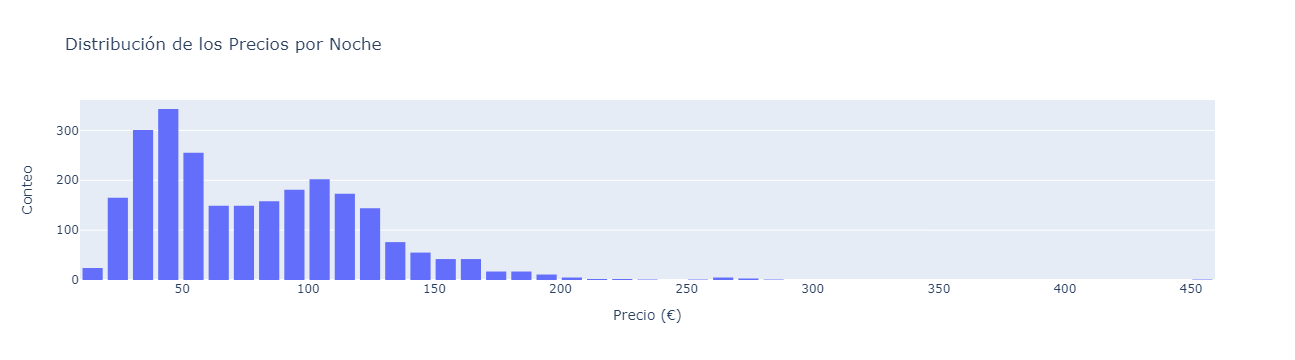

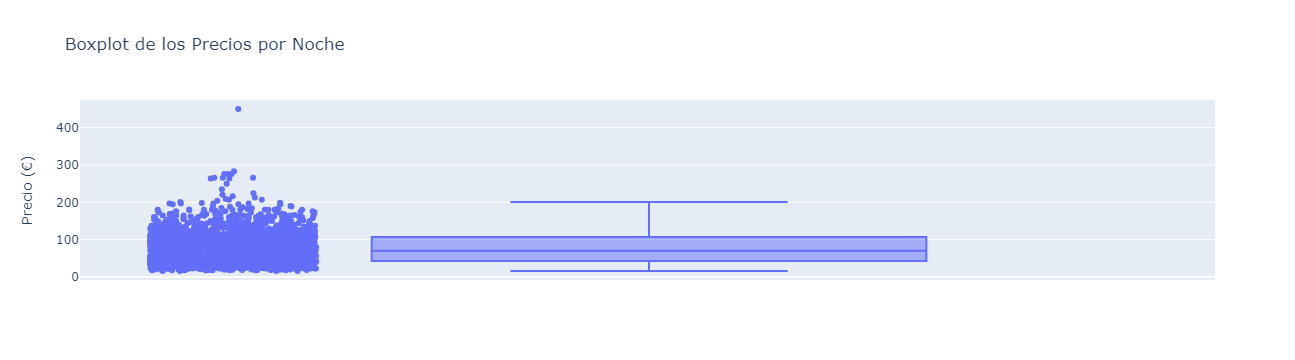

In [23]:
df_no_zero_prices = df[df['prices_per_night'] != 0]

hist_fig = px.histogram(df_no_zero_prices, x='prices_per_night', nbins=80, title="Distribución de los Precios por Noche")
hist_fig.update_layout(xaxis_title="Precio (€)", yaxis_title="Conteo", bargap=0.2)

box_fig = px.box(df_no_zero_prices, y='prices_per_night', points='all', title="Boxplot de los Precios por Noche")
box_fig.update_layout(yaxis_title="Precio (€)")

# Mostrar gráficos
hist_fig.show()
box_fig.show()

#### **Análisis con Z-score**

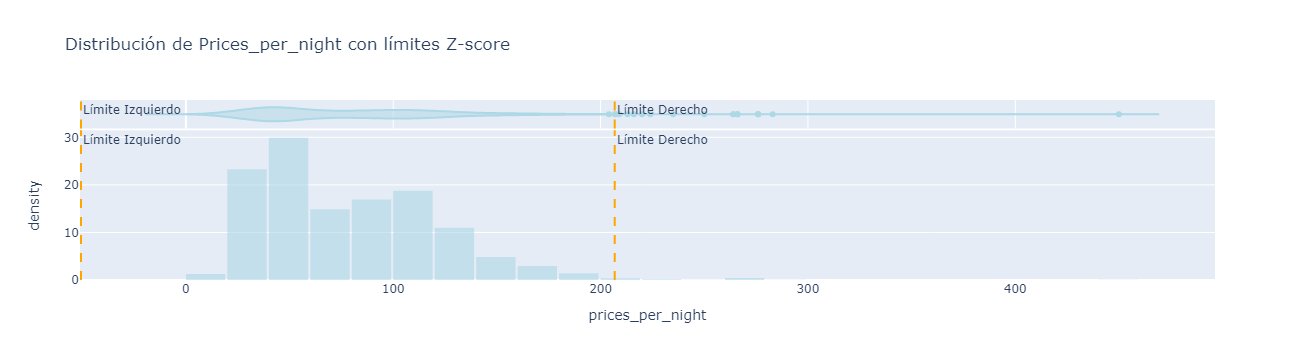

In [25]:
# Calcular el Z-score para 'Prices_per_night'
z_score = stats.zscore(df['prices_per_night'])

mean = df['prices_per_night'].mean()
std = df['prices_per_night'].std()

# Calcular los límites izquierdo y derecho
lim_l = mean - 3 * std  # Límite inferior
lim_r = mean + 3 * std  # Límite superior


hist_fig = px.histogram(df, x='prices_per_night', nbins=30, opacity=0.6, 
                        title="Distribución de Prices_per_night con límites Z-score",
                        marginal="violin", histnorm="density")
hist_fig.update_traces(marker=dict(color="lightblue"))
hist_fig.update_layout(bargap=0.05)

# Añadir líneas verticales para los límites izquierdo y derecho
hist_fig.add_vline(x=lim_l, line_width=2, line_dash="dash", line_color="orange", 
                annotation_text="Límite Izquierdo")
hist_fig.add_vline(x=lim_r, line_width=2, line_dash="dash", line_color="orange", 
                annotation_text="Límite Derecho")

hist_fig.show()

- El análisis de precios muestra donde la mayoría de los precios se concentran. Sin embargo, existen algunos precios más altos, entre 200 y 239, que superan el límite Z-score. Aunque estos valores son técnicamente outliers, no necesariamente indican datos erróneos, sino precios más altos que podrían corresponder a alojamientos de lujo o con características especiales.

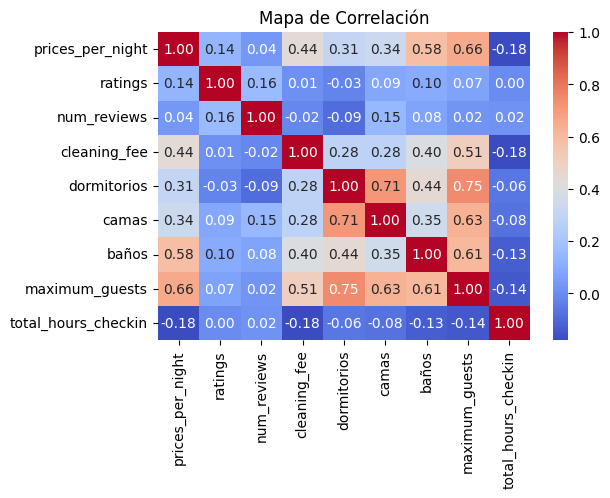

In [28]:
df_corr = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_corr.corr()

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
ax.set_title('Mapa de Correlación')
plt.show()


- En esta sección, presentamos el **Mapa de Correlación** para analizar las relaciones entre las diferentes variables numéricas del conjunto de datos de Airbnb. En general, el mapa de correlación nos ayuda a identificar qué variables están más fuertemente asociadas, lo que puede ser útil para predecir precios o identificar patrones interesantes en el comportamiento de los huéspedes.

1. **Maximum_guests** tiene la mayor correlación con **Prices_per_night (Precio por Noche)**y sugiere que, en general, las propiedades con una mayor capacidad para huéspedes tienden a tener precios más altos por noche.

2. **Prices_per_night** y **Cleaning_fee** presentan una correlación positiva significativa de **0.49**, lo que indica que, en general, las propiedades con precios más altos tienden a tener tarifas de limpieza más elevadas.
3. **Maximum_guests** tiene una fuerte correlación positiva con **Dormitorios** y **Camas**. Esto es normal, porque sugiere que las propiedades con mayor capacidad de huéspedes generalmente cuentan con más camas y dormitorios.
4. La correlación entre **ratings** y **num_reviews** es moderada , lo que indica que las propiedades con más reseñas tienden a tener una calificación media un poco más alta.



# Analisis servicios

In [68]:
df1 = pd.read_csv('data/df_final_cleaned.csv')

In [70]:
df2 = pd.read_csv('data/df_servicios_final_cleaned.csv')
df2

category  \
0                              baño   
1                              baño   
2                              baño   
3                              baño   
4                              baño   
...                             ...   
75051  aparcamiento e instalaciones   
75052  aparcamiento e instalaciones   
75053                     servicios   
75054                     servicios   
75055                     servicios   

                                                    urls  \
0      https://www.airbnb.es/rooms/126311759129279497...   
1      https://www.airbnb.es/rooms/126311759129279497...   
2      https://www.airbnb.es/rooms/126311759129279497...   
3      https://www.airbnb.es/rooms/126311759129279497...   
4      https://www.airbnb.es/rooms/126311759129279497...   
...                                                  ...   
75051  https://www.airbnb.es/rooms/14352069?adults=1&...   
75052  https://www.airbnb.es/rooms/14352069?adults=1&...   
75053  https://www.airbnb.es/rooms/14352069?adults=1&...   
75054  https://www.airbnb.es/rooms/14352069?adults=1&...   
75055  https://www.airbnb.es/rooms/14352069?adults=1&...   

                                                services  
0                                        secador de pelo  
1                                  productos de limpieza  
2                                                 champú  
3                                           gel de ducha  
4                                          agua caliente  
...                                                  ...  
75051                                           ascensor  
75052                                       aparcamiento  
75053  disponible para estancias largaspermite estanc...  
75054                                   llegada autónoma  
75055                      caja de seguridad para llaves  

[75056 rows x 3 columns]

In [72]:
df2['category'].unique()

array(['baño', 'dormitorio y lavandería', 'entretenimiento',
       'calefacción y refrigeración', 'seguridad en el hogar',
       'internet y oficina', 'cocina y comedor',
       'características de la ubicación', 'exterior',
       'aparcamiento e instalaciones', 'servicios',
       'privacidad y seguridad', 'para familias'], dtype=object)

In [74]:
# Hacemos merge del df de la habitacion con el de servicios
df3 = pd.merge(left = df1, right = df2,how = 'inner',on = "urls")

In [76]:
df3.columns

Index(['urls', 'timestamp', 'record_id', 'titles', 'host_name',
       'property_types', 'prices_per_night', 'location', 'ratings',
       'num_reviews', 'cleaning_fee', 'dormitorios', 'camas', 'baños',
       'maximum_guests', 'check_in_hour', 'check_out_hour',
       'total_hours_checkin', 'category', 'services'],
      dtype='object')

In [78]:
df_services_merged = df3[['urls','prices_per_night','category','services']]

In [80]:
# Averiguamos los 10 servicios mas ofrecidos
top_10_services = df_services_merged.groupby("services").agg({"prices_per_night" : "count"}).sort_values("prices_per_night", ascending = False).head(10).index

Text(0, 0.5, 'Servicios')

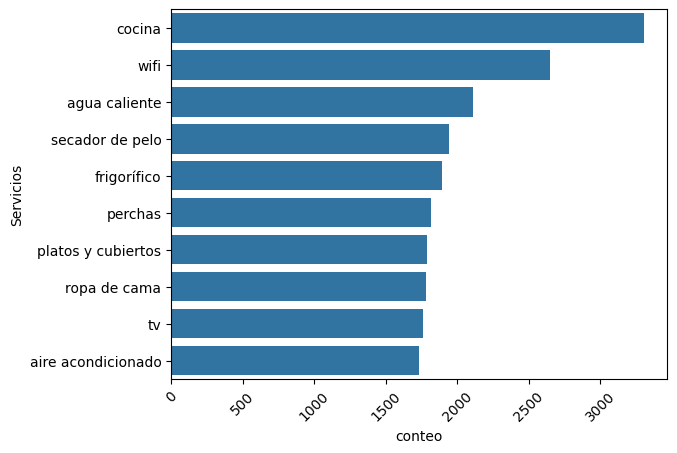

In [82]:
sns.countplot(data = df_services[df_services["services"].isin(top_10_services)]["services"],
             order = top_10_services
     )
plt.xticks(rotation = 45)
plt.xlabel('conteo')
plt.ylabel('Servicios')